# Actividad 03: Regresión Logística

El objetivo de esta actividad es que programes tú mismo el algoritmo de entrenamiento del modelo de Regresión Logística. Para probar tu modelo vas a tener que usar el _dataset_ de flores _Iris_.

## Parte 1 (3 pts): programando el modelo

En el codigo de abajo hay una clase llamada `LogisticRegression` cuyo constructor recibe como parámetro el número de _features_ que espera recibir. Tienes que completar esta clase para que pueda entrenar y predecir. Lo que necesitas es:

- Programar el método `train`, que vendría a ser equivalente al método `fit` de Scikit Learn. Tienes que utilizar el algoritmo _Gradient Descent_ visto en clases.
- Programar el método `predict` que asume que tu modelo ya está entrenado.

Para hacer esto puedes hacer los supuestos razonables que estimes conveniente. Además, si te acomoda trabajar sin clases puedes hacerlo, mientras uses el algoritmo de _Gradient Descent_. **Importante**: puedes asumir que una instancia es "positiva" si la probabilidad es `>=` que 0.5.

Recuerda además que el gradiente de la función objetivo para cada $\beta_i$ es:

$$
\frac{\delta}{\delta \beta_i}L(\beta) = \frac{1}{n} \sum_{i=1}^n (\sigma(\beta^T x_i) - y_i) x_i^j
$$

Donde $L(\beta)$ es la función objetivo, $\beta$ es el vector de coeficientes para la regresión, tenemos $n$ filas en nuestro _dataset_, $\sigma(x)$ es la función $\frac{1}{1 + e^{-x}}$, $x_i$ es la fila $i$ de nuestro dataset (y asociado tiene su respuesta $y_i$) y finalmente $x_i^j$ es la columna $j$ de la fila $i$ en nuestro _dataset_.

In [53]:
# Tienes que programar la parte 1 aquí
import numpy as np

# La función sigmoide
def sigmoid(x):    
    output = 1 / (1 + np.exp(-x))
    return output

class LogisticRegression:
    def __init__(self, number_of_features, learning_rate=0.001, number_of_iterations=100):
        self.learning_rate = learning_rate
        self.number_of_iterations = number_of_iterations
        self.beta = np.array(np.random.randn(number_of_features, 1).T[0])
        
    def train(self, X, y):
        #loop principal
        for i in range(self.number_of_iterations):
            bi = self.prod(X)
            h = sigmoid(bi)
            errors = y-h
            self.beta[1:] += -self.learning_rate*X.T.dot(errors)
            self.beta[0] += -self.learning_rate*errors.sum()
        return self.beta
    
    def predict(self, value):
        return np.where(sigmoid(self.prod(X))>= 0.5, 0, 1)
    
    def prod(self, X):
        return np.dot(X, self.beta[1:]) + self.beta[0]

# Ejemplo de uso de la clase para 3 features
log_reg_ = LogisticRegression(3)
print(log_reg_.beta)

[ 1.29085295 -0.5646616  -0.19200979]


## Parte 2 (1 pto): entrenando el modelo

En esta parte tendrás que hacer un clasificador de flores _Iris Virginica_ en base al largo y ancho del pétalo. Así, tu modelo se tiene que comportar como el que vimos en clases, en el que entrenabamos con los largos y anchos de los pétalos del _dataset_ y nuestras respuestas correspondían a si la flor era o no _Iris Virginica_.

In [54]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, (2,3)] # Nos quedamos solamente con el ancho del pétalo
y = (iris['target'] == 2).astype(np.int) # Dejamos True en las filas que son Virginica

# Recuerda que vas a tener que usar la versión con bias del dataset
# Es decir, añadir una primera columna solamente con 1s
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Ahora un ejemplo de como multiplicar la fila 0 con los coeficientes transpuestos (descomentar linea siguiente)
log_reg_.beta.T.dot(X_b[0,:].reshape(3,1))


# Entrena el modelo acá, debería ser como la siguiente línea

log_reg_.train(X, y)

array([ -3.53977581, -27.99973198, -10.24833187])

## Parte 3 (2 pts): entendiendo los resultados de tu modelo

En clases vimos un gráfico que en los ejes tenía el largo y el ancho del pétalo, donde podíamos ver de forma gráfica como nuestro modelo genera una recta que divide los puntos que corresponden a las flores _Iris Virginica_ de las que no lo son. En esta parte de la tarea debes hacer el mismo gráfico, pero con los resultados que entregó tu modelo. compara este gráfico con el entregado por SciKit Learn.

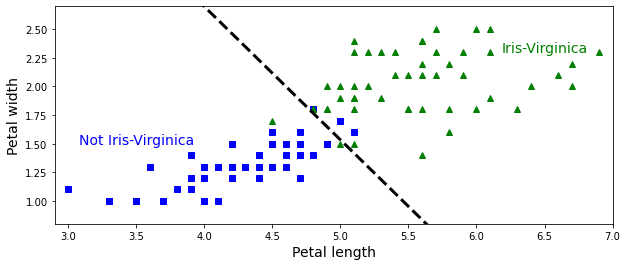

In [78]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

left_right = np.array([2.9, 7])

# Hacemos una linea que divida las dos clases
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
boundary_new = -(log_reg_.beta[0] * left_right + log_reg_.beta[2]) / log_reg_.beta[1]
boundary_new[0] = boundary_new[0]*-1
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.plot(left_right, boundary_new, "r--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

### Parte 4 \[Bonus\] (0.5 pts): gradient descent y resultados

En esta parte la idea es entender cómo cambia la división de nuestro _dataset_ a medida que pasan las iteraciones del algoritmo de _Gradient Descent_. Por lo mismo la idea es repetir el gráfico de arriba pero esta vez con un _widget_ que nos permita escoger la i-ésima iteración del algoritmo de _Gradient Descent_. El _widget_ debe ir desde 0 a 1000 iteraciones.

In [ ]:
# Realiza el bonus acá

## Detalles académicos

Este control pueden realizarlo en grupos de hasta dos personas. La entrega de este control debe ser un archivo comprimido donde se encuentre un **Jupyter Notebook**, junto a cualquier archivo que estés llamando desde tu código. **La fecha de entrega es hasta el viernes 9 de octubre, hasta las 20:00 pm, cualquier entrega después de este plazo será calificada con la nota mínima**. La nota se calcula como el número de puntos + un punto base. El archivo comprimido se entrega en un cuestionario de Webcursos.